# ScientISST MOVE: Getting Started in CSV format
Please cite:
_Saraiva et al., ScientISST MOVE: Activity-annotated Multimodal Biosignals acquired from multiple Wearable Devices, Scientific Data (2023)_

## A. Download Dataset

In [ ]:
import wget, zipfile, os

# Download dataset in LTBio format
url = 'https://zenodo.org/record/7940439/files/biosignal.zip?download=2'
filename = wget.download(url)  # into to the current directory

# Decompress zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('csv.zip')

# Delete zip file
os.remove(filename)

## B. Install Pandas

In [ ]:
# Create a virtual environment
!python -m venv env  # comment this if already created

# Install LTBio
!pip install pandas  # comment this if already installed

## 1. Load and Explore a Biosignal
Let's use subject XXXX as an example. Consider we will need only the ECGs for this project.

In [10]:
import pandas as pd
code = 'F408'
f408_signals = pd.read_csv(f'csv/{code}.csv', index_col=0, parse_dates=True)
f408_signals.head(10)

/var/folders/yp/qjmyvzp539n00fqw0kyr3b940000gn/T/ipykernel_55778/3691821007.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  f408_signals = pd.read_csv(f'csv/{code}.csv', index_col=0, parse_dates=True)


,ecg:dry,ecg:gel,eda:dry,eda:gel,emg:Left Bicep,temp:temp,ppg:Left index finger,ppg:Left Wrist,acc_e4:z,acc_e4:x,acc_e4:y,acc_chest:x,acc_chest:y,acc_chest:z,activities
2000-01-01 00:00:00.000,NaN,NaN,NaN,16.644287,1.482,NaN,2085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.002,NaN,NaN,NaN,16.644287,1.488,NaN,2055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.004,NaN,NaN,NaN,16.632080,1.515,NaN,2025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.006,NaN,NaN,NaN,16.613770,1.582,NaN,1995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.008,NaN,NaN,NaN,16.619871,1.633,NaN,1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.010,NaN,NaN,NaN,16.644287,1.673,NaN,1929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.012,NaN,NaN,NaN,16.638184,1.680,NaN,1895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.014,NaN,NaN,NaN,16.632080,1.653,NaN,1861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.016,NaN,NaN,NaN,16.625977,1.583,NaN,1830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01 00:00:00.018,NaN,NaN,NaN,16.644287,1.535,NaN,1792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above we can see the first 10 lines of the CSV file. In these files, all sensors are equally sampled, and NaNs represent interruptions in the acquisitions.
Values are given in the respective modality units (mV, uS, g, ºC), as specified in the article.

Let's get a quick sneak-peak of the ECG signals:

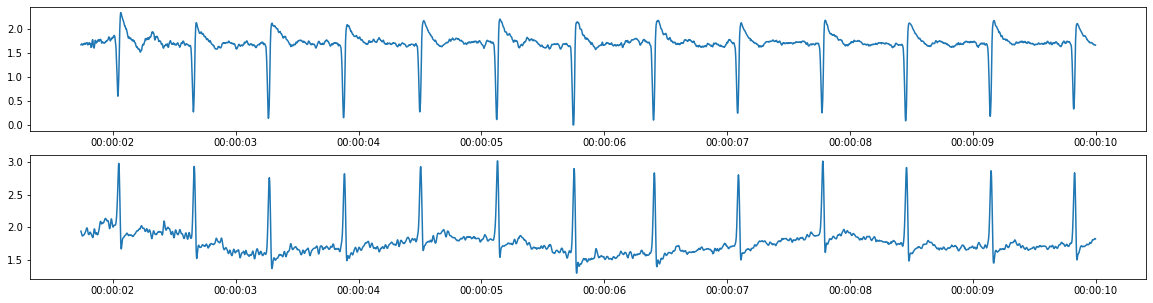

In [18]:
from matplotlib import pyplot as plt

ecg = f408_signals[['ecg:dry', 'ecg:gel']]
plt.figure(figsize=(20, 5))
plt.subplot(211)
plt.plot(ecg['ecg:dry'].head(5000))
plt.subplot(212)
plt.plot(ecg['ecg:gel'].head(5000))
plt.show()

With `head(5000)` we can see approximately the first 10 seconds.

We can notice that the "dry" channel is upside down, so let's invert it:

/var/folders/yp/qjmyvzp539n00fqw0kyr3b940000gn/T/ipykernel_55778/1972794761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg['ecg:dry'] = -ecg['ecg:dry']


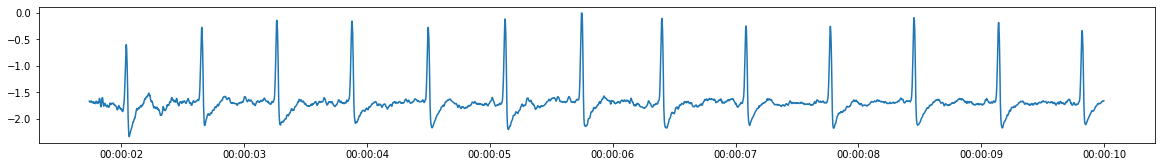

In [21]:
ecg['ecg:dry'] = -ecg['ecg:dry']
plt.figure(figsize=(20, 2.5))
plt.plot(ecg['ecg:dry'].head(5000))
plt.show()

## 2. Index a Biosignal
Awsome! Let's see the ECG when the subject was lifting a chair. As stated in the article, we should look for `lift` in the activities' column:

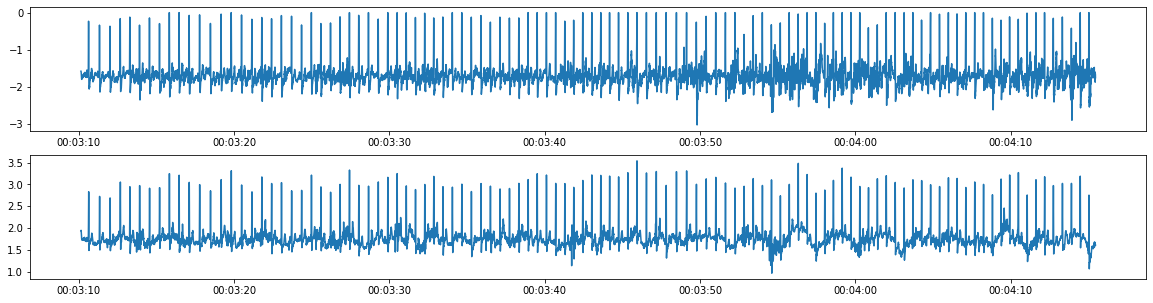

In [35]:
ecg_while_lift = ecg[f408_signals['activities'] == 'lift,']
plt.figure(figsize=(20, 5))
plt.subplot(211)
plt.plot(ecg_while_lift['ecg:dry'])
plt.subplot(212)
plt.plot(ecg_while_lift['ecg:gel'])
plt.show()

## 3. Post-Processing
We can use Pandas and other Python libraries to process our signals!
Let's just get the gel electrodes first to work on that signal only and convert it to a NumPy array:

In [49]:
gel_ecg = f408_signals['ecg:gel']
gel_ecg = gel_ecg.to_numpy()
gel_ecg.shape

(1406567,)

Firstly, let's resample it to 100 Hz:

In [45]:
from scipy.signal import resample

# Signal is originally sampled at 500 Hz
gel_ecg = resample(gel_ecg, 100 * len(gel_ecg) // 500)

Now let's filter the signal wih a simple FIR passband from 1 to 40 Hz:

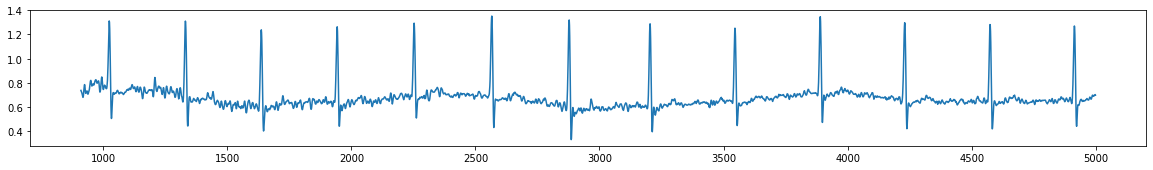

In [51]:
from biosppy.signals.tools import filter_signal

gel_ecg = filter_signal(gel_ecg, 'FIR', 'bandpass', order=20, frequency=(1, 40), sampling_rate=100)['signal']
plt.figure(figsize=(20, 2.5))
plt.plot(gel_ecg[:5000])
plt.show()

________
© 2023 ScientISST. All rights reserved.

Notebook offered by the [LTBio team](https://github.com/jomy-kk/LTBio).
Contact: joaomiguelsaraiva@tecnico.ulisboa.pt